## Import basic data and libraries

In [1]:
import warnings
# Ignore all wanings
warnings.filterwarnings('ignore')

# basic library
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# statistics library
import scipy.stats as stats

# model building, decision tree

# model building, random forest

# model building, naive bayes

# model building, XG Boost



df = pd.read_csv('HR_comma_sep.csv')

In [2]:
# take a look of data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# check data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Change column name as it is typo
df.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# change column 'time_spend_company' to 'year_spent' as it makes sense
df.rename(columns={'time_spend_company': 'year_spent'}, inplace=True)



## Explonatory Data Analysis
Qucik brain storming of explonatory data analysis.
1. Workload of employees might effects on turnover rate. number_project, average_monthly_hours,left
2. Safety issues can effects on turnover rate, acident and left
3. evaluation and satisfaction can be different as what company thinks about the employees can be different. last_evaluation satiscation_level left
4. spending a long time without promotion can be a reason to leave the company. promotion, time_spend_company vs promotion left 


### 1. Workload of employees might effects on turnover rate. number_project, average_monthly_hours,left

In [5]:
def make_left (df, x_var):
    '''
    make a new data frame including x_var and left columns. then filter the data frame with emplyees
    who left the work. finally make a data frame with counts of values by x_variable.
    Arguments
        df (data frame) any data frame can be acceptable if it contains 'left' column
        x_var (str) any variables in df.
    return
        result (data frame) values counts data frame, ready to build visalization
    '''
    new_df_left = df[[x_var, 'left']]
    new_df_left = new_df_left[new_df_left['left'] == 1]
    new_df_left = new_df_left.value_counts().reset_index()
    new_df_left = new_df_left.drop('left', axis = 1)
    new_df_left.columns = [x_var, 'counts']
    
    return new_df_left
    
def make_stay (df, x_var):
    '''
    make a new data frame including x_var and left columns. then filter the data frame with emplyees
    who left the work. finally make a data frame with counts of values by x_variable.
    Arguments
        df (data frame) any data frame can be acceptable if it contains 'left' column
        x_var (str) any variables in df.
    return
        result (data frame) values counts data frame, ready to build visalization
    '''
    new_df_left = df[[x_var, 'left']]
    new_df_left = new_df_left[new_df_left['left'] == 0]
    new_df_left = new_df_left.value_counts().reset_index()
    new_df_left = new_df_left.drop('left', axis = 1)
    new_df_left.columns = [x_var, 'counts']
    
    return new_df_left
    

left = make_left(df,'number_project')
stay = make_stay(df,'number_project')


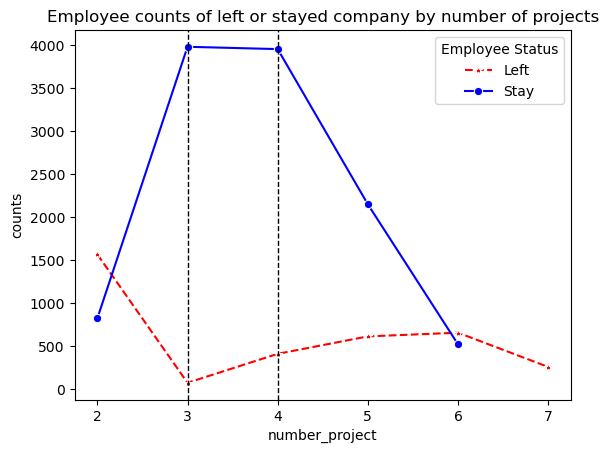

In [6]:

# Creating the line plots with labels
ax = sns.lineplot(x='number_project', y='counts', data=left, color='red', linestyle='--', marker='*', label="Left")
sns.lineplot(x='number_project', y='counts', data=stay, color='blue', linestyle='-', marker='o', label="Stay")

# Adding the legend
ax.legend(title="Employee Status")

# Adding lines on 3 and 4
plt.axvline(x = 3, color = 'black', linewidth = 1, linestyle = '--')
plt.axvline(x = 4, color = 'black', linewidth = 1, linestyle = '--')

plt.title('Employee counts of left or stayed company by number of projects')
plt.show()



## Employees left and stay by number of project
1. employees stayes with 3 and 4 projects
2. employees left less with 3 and 4 projects
3. employees tend to stay at the company wiht 3 and 4 projects.
4. employees with 2 projects tend to leave the company
5. more than 4 projects tend to allow employees leaving the company.
6. 7 projects has low number of employees leaving the company.

### Summary
Employees with 3 or 4 projects are more likely to stay at the company, while those with only 2 projects tend to leave. Having more than 4 projects increases the chances of employees leaving, except for those with 7 projects, where departures are relatively low. 

     average_monthly_hours  counts
0                      135      75
1                      156      62
2                      151      58
3                      127      57
4                      149      54
..                     ...     ...
159                    169       1
160                    196       1
161                    188       1
162                    204       1
163                    165       1

[164 rows x 2 columns]
     average_monthly_hours  counts
0                      224     102
1                      173      96
2                      149      94
3                      167      94
4                      162      94
..                     ...     ...
187                    116      10
188                    119      10
189                    107      10
190                    277       8
191                     96       6

[192 rows x 2 columns]


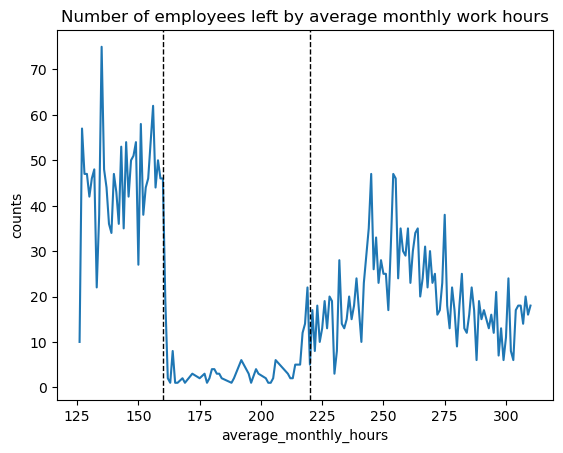

In [7]:
left = make_left(df, 'average_monthly_hours')
stay =  make_stay(df, 'average_monthly_hours')

print(left)
print(stay)

ax = sns.lineplot(x = 'average_monthly_hours', y = 'counts', data = left)

# Adding vertical lines on graph where the average work hours is 160 and 220
plt.axvline(x = 160, color = 'black', linewidth = 1, linestyle = '--')
plt.axvline(x = 220, color = 'black', linewidth = 1, linestyle = '--')

plt.title('Number of employees left by average monthly work hours')
plt.show()

## Average Monthly hours of work and employee left
1. employees with 160 and 220 hours in a month tend to leave the company less than other average monthly hours.
2. employees work less than 160 hours in a month leave the company.
3. after 220 hours of monthly work, employee turnover rate increase.

### Summary
Employees who work between 160 and 220 hours per month have the lowest turnover rates. Those working fewer than 160 hours tend to leave, while turnover increases for employees working more than 220 hours.

## Next step
I would like to confirm that low turnover rate with optimized projects and average work hour is different from other or by chance.


In [8]:
# make a new data frame
df_left = df[['number_project','average_monthly_hours','left']]

# make a new column, called opimal, 3-4 project and 160 - 220 work hours in a month
df_left['left'].value_counts()
df_left_optimal = df_left[(df_left['number_project'] >= 3) & (df_left['number_project'] <= 4) & (df_left['average_monthly_hours'] >= 160) & (df_left['average_monthly_hours' ]<= 220)]
# df_left.loc[(df_left['number_project'] >= 3) & (df_left['number_project'] <= 4), 'number_project']

# assign df_left_others with non-optimized number_project and average_monthly_hours
df_left_others = df_left[~df_left.set_index(['number_project','average_monthly_hours','left']).index.isin(df_left_optimal.set_index(['number_project','average_monthly_hours','left']).index)]

# perform hypothesis test to make sure there is different between work optimized employees and others.
# H_0 : the employees with optimized monthly work hours and projects number have the same turnover rate as unopimized employees.
# H_A : the employees with optimized monthly work hours and projects number have different turnover rate from unopimized employees.    

# print('df_left_optimal : ' ,df_left_optimal.shape)
# print('df_left_others : ' ,df_left_others.shape)


opt_df = df_left_optimal['left'].value_counts().tolist()
print('counts of stay and left in optimized group: ' , opt_df)
other_df = df_left_others['left'].value_counts().tolist()
print('counts of stay and left in other group: ' , other_df)

opt_table = np.array([opt_df, other_df])
opt_table
chi2_stat, p_value, _ , _ = stats.chi2_contingency(opt_table)

print(chi2_stat, p_value)

if p_value  < 0.001:
    print('reject the null hypothesis and there is a significant difference on turelnover rate between employees with optimized and non-optimized work hours and projects')
else :
    print('Fail to reject the null hypothesis. there is no difference of turnover rate between two groups.')

counts of stay and left in optimized group:  [3295, 69]
counts of stay and left in other group:  [8133, 3502]
1130.1233374356502 9.371930031000249e-248
reject the null hypothesis and there is a significant difference on turelnover rate between employees with optimized and non-optimized work hours and projects


## Finding
There is strong evidence agianst the null hypothesis with 99.9 confidence level(0.1 significant level). The turnover rate of employees with optimaized work hours(averager monthly work hours bewteen 160 and 220) and projects number(2 or 3 projects) is different from other employees. 

## Next steps
I will calcualte turnover rate of two groups and check how they are different.

In [9]:
# Calculate turnover rate of optimal and others.
left_other = round(df_left_others.shape[0] / df_left.shape[0],2)
left_optimal = round(df_left_optimal.shape[0] / df_left.shape[0],2)

print('Emplyees turnover rate with optimal work : ', left_optimal)
print('Emplyees turnover rate without optimal work : ', left_other)


Emplyees turnover rate with optimal work :  0.22
Emplyees turnover rate without optimal work :  0.78


## Suggestions
Project numbers and monthly work hours play a key role in employee turnover. Maintaining an optimal workload—3 to 4 projects and 160 to 220 hours per month—reduces turnover to 22%, while employees outside this range experience a higher 78% turnover rate. Redistributing tasks from overworked employees to those with only 2 projects and fewer than 160 hours can further improve retention.

### 2. Safety issues can effects on turnover rate, acident and left

   Work_accident  left
0              0  3402
1              1   169


Text(0.5, 1.0, 'Employee left by work accidents')

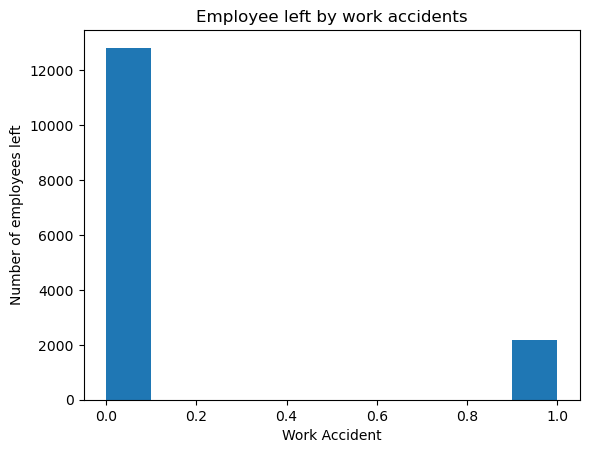

In [10]:
df_accident = df[['Work_accident','left']]
df_acc_grp = df_accident.groupby('Work_accident').sum().reset_index()
print(df_acc_grp)

plt.hist(df_accident['Work_accident'])
plt.xlabel('Work Accident')
plt.ylabel('Number of employees left')
plt.title('Employee left by work accidents')


## Fininding
1. employees without accident left the company way more than employee with accident.

As we see the histogram above, the work accident does not have effect on number of employees left the company.

### 3. evaluation and satisfaction can be different as what company thinks about the employees can be different. last_evaluation satiscation_level left


In [11]:
df_eval_sat = df[['satisfaction_level', 'last_evaluation', 'left']]
df_eval_sat.head()

# creating a new variable sat_eval, which is the ratio of satisfaction over evaluation. range from 0 to 10 and possible that the evaluation is zero. this will cause issue of zero denomiation or missing values

print(df_eval_sat['last_evaluation'].isna().sum())
print(df_eval_sat[df_eval_sat['last_evaluation'] == 0 ])

df_eval_sat['sat/eval'] = df_eval_sat['satisfaction_level'] / df_eval_sat['last_evaluation']
df_eval_sat.drop(columns = ['satisfaction_level', 'last_evaluation'], axis = 1, inplace = True)
df_eval_sat

df_left = make_left(df_eval_sat, 'sat/eval')
df_stay = make_stay(df_eval_sat, 'sat/eval')
# df_left
# df_stay


0
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, left]
Index: []


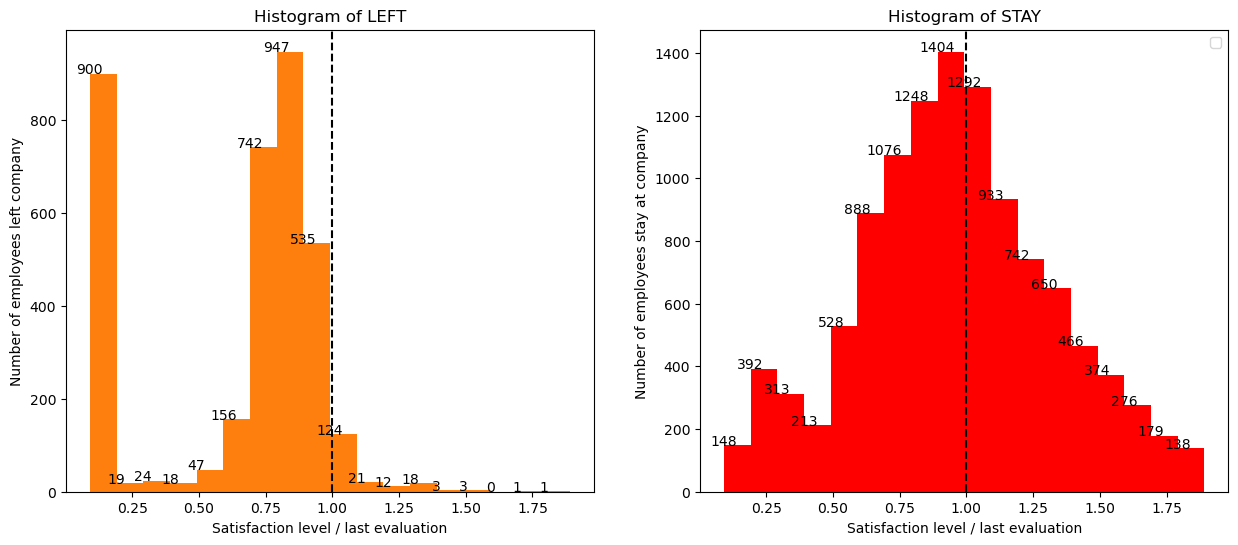

In [12]:
# df_eval_sat.head()
fig, axes = plt.subplots(1,2, figsize = (15, 6))

df_left = df_eval_sat[df_eval_sat['left'] == 1]
# print(df_left)
df_stay = df_eval_sat[df_eval_sat['left'] == 0]

#ax = sns.distplot(df_left)
bin_width = 0.1
bins = np.arange(min(df_left['sat/eval']),max(df_left['sat/eval']) + bin_width, bin_width)
# left vs sat/eval
axes[0].hist(df_left['sat/eval'], bins = bins, label = 'Left')
axes[0].set_xlabel('Satisfaction level / last evaluation')
axes[0].set_ylabel('Number of employees left company')
axes[0].set_title('Histogram of LEFT')
axes[0].axvline(x = 1, color = 'black', linestyle = '--')
plt.legend()

axes[1].hist(df_stay['sat/eval'], bins = bins, color = 'red', label = 'Stay')
axes[1].set_xlabel('Satisfaction level / last evaluation')
axes[1].set_ylabel('Number of employees stay at company')
axes[1].set_title('Histogram of STAY')
axes[1].axvline(x = 1, color = 'black', linestyle = '--')


# Left group histogram with text labels
counts_left, bins_left, _ = axes[0].hist(df_left['sat/eval'], bins=bins, label='Left')
for bin_center, count in zip(bins_left[:-1], counts_left):
    axes[0].text(bin_center, count, str(int(count)), ha='center', fontsize=10, color='black')

# Stay group histogram with text labels
counts_stay, bins_stay, _ = axes[1].hist(df_stay['sat/eval'], bins=bins, color='red', label='Stay')
for bin_center, count in zip(bins_stay[:-1], counts_stay):
    axes[1].text(bin_center, count, str(int(count)), ha='center', fontsize=10, color='black')

plt.show()


## Fininding
1. Employees with sat/eval ratio less than 1 tend to leave the company more than other employees.
2. Higher satisfaction level comparing to last evaluation score encourage low turnover rate.
3. Employees with sat/eval ratio close to 1 tend to stay the compnay.
4. Employees with unbalanced sat/eval ratio stay less than employees with balanced ratio.

## Summary
Satisfaction level over last evaluation ratio is a good indicator of employees turnover rates. Maintaining the ratio over 1 will reduce turnover rate and encourage employees stay at the company.


## Next step
Find out what drives high satisfaction level.

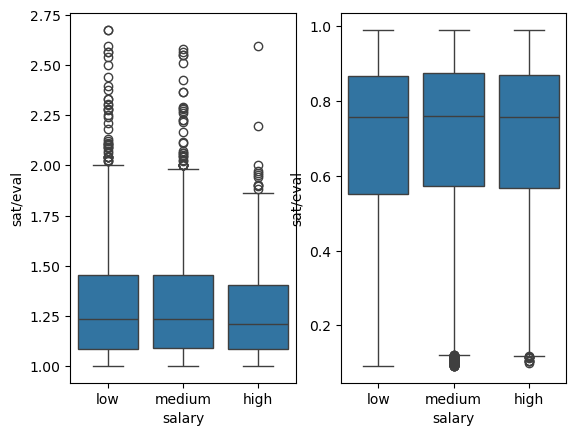

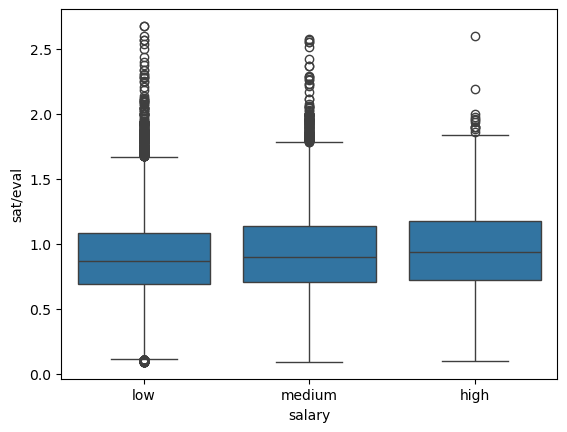

In [13]:
# Add sat/eval ratio to the base data frame
df['sat/eval'] = df['satisfaction_level'] / df['last_evaluation']
# f.head()

# make a new data frame with salary sat/eval.
df_salary = df[['salary','sat/eval','left']]

# df_salary.head()
# df_salary.groupby('salary').mean()

# If sat/eval more than 1 is effected by income group, the average ratio has to be different.
# Also, if sat/eval less than 1 is effected by income group, the average ratio has to be different.
# make two different data set separating by set/eval.
df_salary_over_1 = df_salary[df_salary['sat/eval'] >= 1]
df_salary_less_1 = df_salary[df_salary['sat/eval'] < 1]

# visialize box plot of average sat/eval ratio over salary categories, where sat/eval is equal or greater than 1 or less than 1.

plt.subplot(1,2,1)
sns.boxplot(x = 'salary', y = 'sat/eval', data = df_salary_over_1)
plt.subplot(1,2,2)
sns.boxplot(x = 'salary', y = 'sat/eval', data = df_salary_less_1)
plt.show()
sns.boxplot(x = 'salary', y = 'sat/eval', data = df_salary)
plt.show()

def boxplot_build(data, x_val, y_val):
    sns.boxplot(x = x_val, y = y_val, data = data)



## Next step
The boxplots show they are no difference by salary, but there are some outliers.
Anova test will confirm that there is difference or not.


## Hypothesis test
H_0 : All income groups has equal mean values of sat/eval ratio.
H_A : At least one of income groups has a different mean of sat/eval ratio

In [14]:
# split sat/eval ratio by income categoriies
df_salary_low = df_salary[df_salary['salary'] == 'low'].drop(['left','salary'], axis = 1)
df_salary_med = df_salary[df_salary['salary'] == 'medium'].drop(['left','salary'], axis = 1)
df_salary_high = df_salary[df_salary['salary'] == 'high'].drop(['left','salary'], axis = 1)

# perform one way anova test
f_stat, p_val = stats.f_oneway(df_salary_low, df_salary_med, df_salary_high)

print("P-values : ", p_val)
print("F_statistics : ", f_stat)

if p_val < 0.05:
    print('Reject the null hypothesis with 0.05 significant level. At least one of income groups have different mean of sat/eval ratio.')
else:
    print('Fail to reject the null hypothesis. all sat/eval mean of income groups are equal')

P-values :  [4.09640368e-09]
F_statistics :  [19.33805093]
Reject the null hypothesis with 0.05 significant level. At least one of income groups have different mean of sat/eval ratio.


## Fininding
Unlike the boxplot, Anova test confirm that at least one of income groups have a different mean of sat/eval ratio.

## Nest step
Use IQR method to deal with outliers and visualize the difference among income groups.
    

In [15]:
# dealing with outliers

# create definition to change outliers to upper and lower bound
def change_outliers(data,var):
    '''
    Calculate IQR, upper and lower bound.
    replace outliers with upper and lower bounds.
    Arguments
        data (data frame) accept any data frame, coppied to df_outliers
        var (str) a column name in data, used to refer row values
    Return
        df_outliers (data frame) containg upper and lower bounds replaced with outliers
    
    '''
    df_outliers = data
    q1 = np.percentile(df_outliers[var], 25)  # First quartile (Q1)
    q3 = np.percentile(df_outliers[var], 75)  # Third quartile (Q3)
    IQR = q3-q1
    print('IQR : ', IQR)
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    print('Lower Bounds : ', lower_bound,'Upper Bounds : ', upper_bound)
    df_outliers.loc[df_outliers[var] >= q3,var] = upper_bound
    df_outliers.loc[df_outliers[var] <= q1,var] = lower_bound
    return df_outliers

# use change_outliers to make a new data frame after dealing with outliers
df_salary = change_outliers(df_salary,'sat/eval')

# double checking changes of outliers.
print('max value :', max(df_salary['sat/eval']))
print('min Value :', min(df_salary['sat/eval']))

# update the base data frame with upper and lower bounds
df = change_outliers(df,'sat/eval')
print('max value :', max(df['sat/eval']))
print('min Value :', min(df['sat/eval']))

IQR :  0.4147540983606559
Lower Bounds :  0.07786885245901609 Upper Bounds :  1.7368852459016397
max value : 1.7368852459016397
min Value : 0.07786885245901609
IQR :  0.4147540983606559
Lower Bounds :  0.07786885245901609 Upper Bounds :  1.7368852459016397
max value : 1.7368852459016397
min Value : 0.07786885245901609


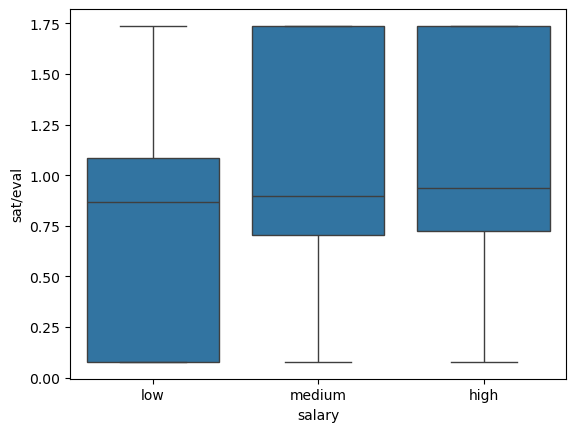

In [16]:
# visualize data after replacing outliers.
boxplot_build(df_salary, 'salary','sat/eval')


## Finding
1. the box plot may be showing that there is different sat/eval score by income category. espcially, the low income group has lower mean of sat/eval ratio comparing to other groups.

## Next steps
perfor hypothesis test to confirm sat/eval difference by income after dealing with outliers.

In [17]:

df_salary_low = df_salary[df_salary['salary'] == 'low'].drop(['left','salary'], axis = 1)
df_salary_med = df_salary[df_salary['salary'] == 'medium'].drop(['left','salary'], axis = 1)
df_salary_high = df_salary[df_salary['salary'] == 'high'].drop(['left','salary'], axis = 1)
df_salary_high
f_stat, p_val = stats.f_oneway(df_salary_low, df_salary_med, df_salary_high)

print("P-values : ", p_val)
print("F_statistics : ", f_stat)

if p_val < 0.05:
    print('Reject the null hypothesis with 0.05 significant level. At least one of income groups have different mean of sat/eval ratio.')
else:
    print('Fail to reject the null hypothesis. all sat/eval mean of income groups are equal')

P-values :  [7.00723668e-08]
F_statistics :  [16.49184767]
Reject the null hypothesis with 0.05 significant level. At least one of income groups have different mean of sat/eval ratio.


## Summary
The ratio of satisfaction level to last evaluation is a crucial feature in predicting employee turnover rates. A ratio above 1 is associated with a lower likelihood of employees leaving, while a well-balanced ratio encourages retention. To identify factors that influence a high satisfaction-to-evaluation ratio, I incorporated salary as a key feature. After handling outliers and visualizing the data, the analysis revealed that employees in the lower income group tend to have a lower mean satisfaction-to-evaluation ratio.

## Next steps
check what drives low mean of sat/eval ratio in low salary group.

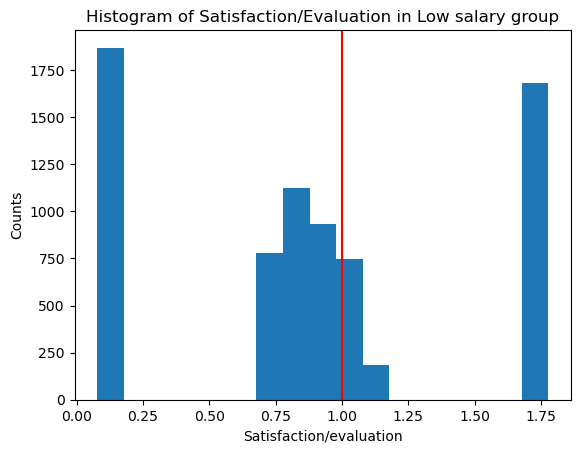

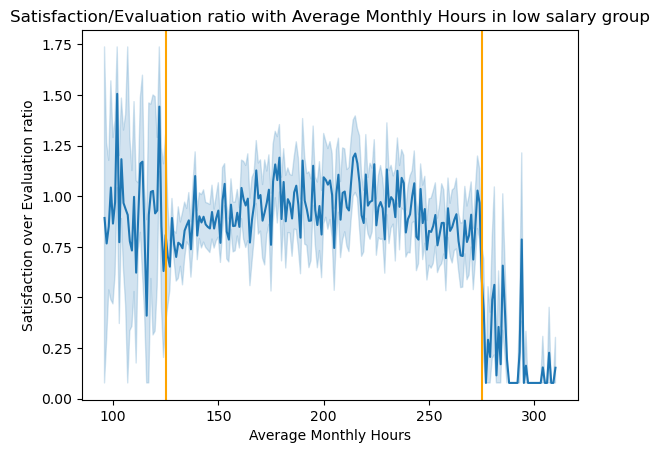

In [18]:
# make a new data frame with low salary
df_low = df[df['salary'] == 'low']
# print(df_low.shape)
width = 0.1
bins = np.arange(min(df_low['sat/eval']), max(df_low['sat/eval']) + width, width)

plt.hist(df_low['sat/eval'], bins = bins)
plt.xlabel('Satisfaction/evaluation')
plt.ylabel('Counts')
plt.title('Histogram of Satisfaction/Evaluation in Low salary group')
plt.axvline(x = 1, color = 'red')
plt.show()

sns.lineplot(x = 'average_monthly_hours', y = 'sat/eval', data = df_low)
plt.ylabel('Satisfaction over Evaluation ratio')
plt.xlabel('Average Monthly Hours')
plt.title('Satisfaction/Evaluation ratio with Average Monthly Hours in low salary group')
plt.axvline(x = 275, color = 'orange')
plt.axvline(x = 125, color = 'orange')

plt.show()




In [19]:
df_low_long = df_low[df_low['average_monthly_hours'] >= 275]
low_long_mean = round(df_low_long['sat/eval'].mean(),2)

df_low_other = df_low[df_low['average_monthly_hours'] < 275]
low_other_mean = round(df_low_other['sat/eval'].mean(),2)

print('Average sat/eval ratio of employees with more than 275 work hours : ',low_long_mean)
print('Average sat/eval ratio of employees with less than 275 work hours : ',low_other_mean)



Average sat/eval ratio of employees with more than 275 work hours :  0.28
Average sat/eval ratio of employees with less than 275 work hours :  0.92


## Fininding
1. Employees with low income groups and more than 275 hours per month in average have low set/eval rate(0.28).
2. Employees with low income groups and less than 275 hours per month in average have moderate set/eval rate(0.92)
3. sat/eval ratio fluctuates under 125 average work hours per month.

## Suggestions
Employees, on average, work more than 275 hours but receive insufficient compensation for their efforts. The company should investigate why these employees are working such long hours without adequate pay, as this imbalance lowers their satisfaction-to-evaluation ratio and increases the likelihood of turnover. Conversely, employees working fewer than 125 hours show fluctuating sat/eval ratios. This issue can be addressed by assigning more tasks and increasing their work hours, which in turn would lead to better salaries and improved employee retention.

## Next steps
Insuffient compensation for their efforts can happen in other income group. Next investigation is to analyse other two groups

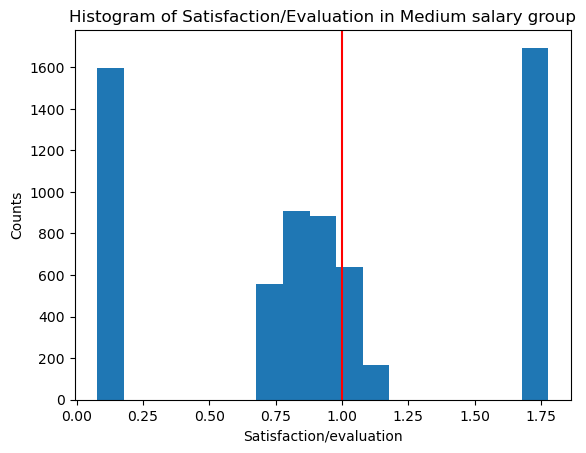

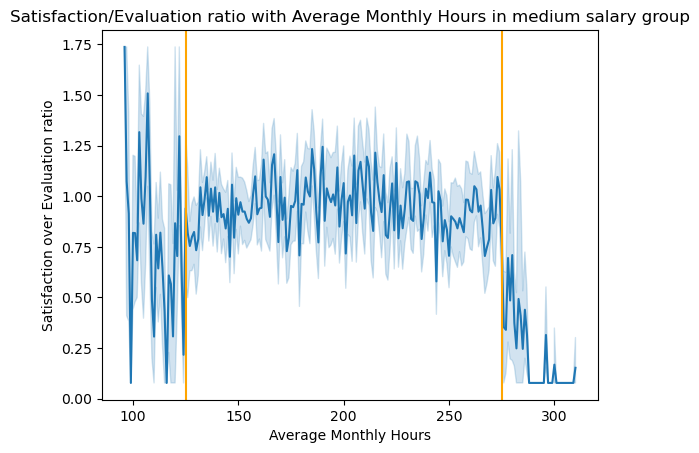

In [20]:
df_med = df[df['salary'] == 'medium' ]
df_med.head()

width = 0.1
bins = np.arange(min(df_med['sat/eval']), max(df_med['sat/eval']) + width, width)

plt.hist(df_med['sat/eval'], bins = bins)
plt.xlabel('Satisfaction/evaluation')
plt.ylabel('Counts')
plt.title('Histogram of Satisfaction/Evaluation in Medium salary group')
plt.axvline(x = 1, color = 'red')
plt.show()

sns.lineplot(x = 'average_monthly_hours', y = 'sat/eval', data = df_med)
plt.ylabel('Satisfaction over Evaluation ratio')
plt.xlabel('Average Monthly Hours')
plt.title('Satisfaction/Evaluation ratio with Average Monthly Hours in medium salary group')
plt.axvline(x = 275, color = 'orange')
plt.axvline(x = 125, color = 'orange')

plt.show()




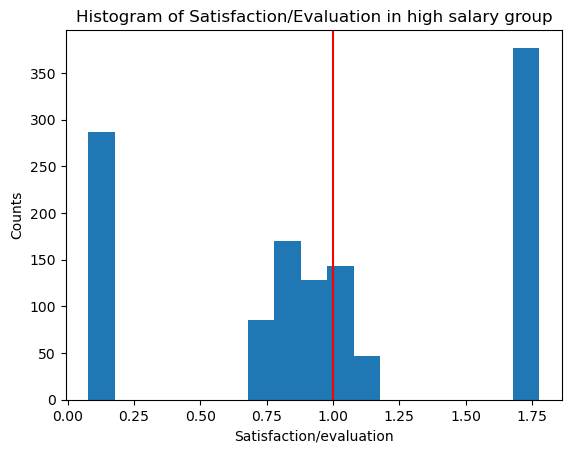

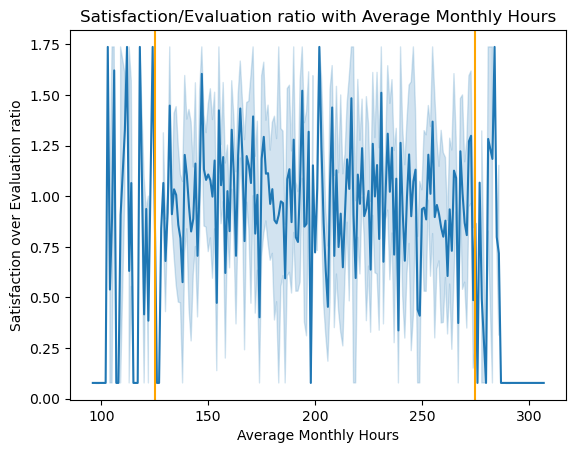

In [21]:
df_high = df[df['salary'] == 'high' ]
# df_high.head()

width = 0.1
bins = np.arange(min(df_high['sat/eval']), max(df_high['sat/eval']) + width, width)

plt.hist(df_high['sat/eval'], bins = bins)
plt.xlabel('Satisfaction/evaluation')
plt.ylabel('Counts')
plt.title('Histogram of Satisfaction/Evaluation in high salary group')
plt.axvline(x = 1, color = 'red')
plt.show()

sns.lineplot(x = 'average_monthly_hours', y = 'sat/eval', data = df_high)
plt.ylabel('Satisfaction over Evaluation ratio')
plt.xlabel('Average Monthly Hours')
plt.title('Satisfaction/Evaluation ratio with Average Monthly Hours')
plt.axvline(x = 275, color = 'orange')
plt.axvline(x = 125, color = 'orange')

plt.show()




In [22]:
df_med_long = df_med[df_med['average_monthly_hours'] >= 275]
med_long_mean = round(df_med_long['sat/eval'].mean(),2)

df_med_other = df_med[df_med['average_monthly_hours'] < 275]
med_other_mean = round(df_med_other['sat/eval'].mean(),2)

print('Average sat/eval ratio of employees with more than 275 work hours in medium salary group: ',med_long_mean)
print('Average sat/eval ratio of employees with less than 275 work hours in medium salary group: ',med_other_mean)



Average sat/eval ratio of employees with more than 275 work hours in medium salary group:  0.33
Average sat/eval ratio of employees with less than 275 work hours in medium salary group:  0.94


## Finiding
1. Medium salary group also is compensated less than their efforts.
2. High salary group dose not show any patterns.

## Suggestion
Medium-salary employees, much like those in lower-income groups, often work over 275 hours on average yet receive inadequate compensation for their efforts. The company should investigate the reasons behind these extended working hours without sufficient pay, as this imbalance results in a low satisfaction-to-evaluation ratio (0.33) and increases the risk of employee turnover.

On the other hand, employees working fewer than 125 hours exhibit fluctuating satisfaction-to-evaluation ratios. To address this issue, additional task assignments and increased working hours could lead to better salaries and improved employee retention.

Furthermore, maintaining a satisfaction-to-evaluation ratio closer to 1 can encourage employees to remain with the company. Employees with a high ratio tend to have lower evaluation scores, which can be improved by fostering skill development. Offering scholarships or training programs with paid hours would provide employees with valuable learning opportunities and contribute to enhanced evaluation scores.




### 4. spending a long time without promotion can be a reason to leave the company. promotion, time_spend_company vs promotion left

In [23]:
df.head()
year_mean = round(df['year_spent'].mean(),2)

In [24]:
# change 'year_spent to ratio
df['year_spent_ratio'] = df['year_spent']/year_mean
# when the ratio is lower than 1, employees work less than 3.5 years
# when the ratio is higher than 1, employees work longer than 3.5 years 
print('Average year spent at the company : ', year_mean)

Average year spent at the company :  3.5


In [25]:
# create a new data frame

df_pro_yes = df[df['promotion_last_5years'] ==1 ]
df_pro_no = df[df['promotion_last_5years'] != 1]

print('Promotion and left')
print( df_pro_yes['left'].value_counts())
print("")
print('No Promotion and left')
print(df_pro_no['left'].value_counts())
print("")

no_pro = df['promotion_last_5years'].sum()
promotion_rate = round((no_pro/df['promotion_last_5years'].count())*100,2)

print('Number of promoted employees : ', no_pro)
print('Promotion_rate : ' , promotion_rate, '%')
print("")

# calculate and print turnover rate of promoted employees
df_pro_yes_left_rate =  round((df_pro_yes['left'].sum() / df_pro_yes.shape[0]) * 100, 2)
print('Turnover rate of employees with promotion : {}%'.format(df_pro_yes_left_rate))
print("")

# calculate and print turnover rate of employees without promotion
df_pro_no_left_rate =  round((df_pro_no['left'].sum() / df_pro_no.shape[0]) * 100, 2)
print('Turnover rate of employees without promotion : {}%'.format(df_pro_no_left_rate))

Promotion and left
left
0    300
1     19
Name: count, dtype: int64

No Promotion and left
left
0    11128
1     3552
Name: count, dtype: int64

Number of promoted employees :  319
Promotion_rate :  2.13 %

Turnover rate of employees with promotion : 5.96%

Turnover rate of employees without promotion : 24.2%


## Finding
1. the promotion rate is only 2.13 %
2. Promoted employees has 5.96% of turnover rate
3. employees without promotion has 24.2% of turnover rate.

## Next steps
Check if there is a difference between groups(group 1 short and group longer than average year spent).

In [26]:
df_pro_yes_sub = df_pro_yes[['year_spent_ratio','left','sat/eval']]
df_pro_yes_sub.head()
df_pro_yes_sub.describe()
df_pro_yes_sub.value_counts()

# divide data by year_spent_ratio with shorter than average year spent
df_pro_yes_sub_less = df_pro_yes_sub[df_pro_yes_sub['year_spent_ratio'] <= 1]
print('average of sal/eval with promotion and less than 1 of year_spen_ratio : ', df_pro_yes_sub_less['sat/eval'].mean())

# assign data by year_spent_ratio with longer than average year spent
df_pro_yes_sub_more = df_pro_yes_sub[df_pro_yes_sub['year_spent_ratio'] >1]
print('average of sal/eval with promotion and more than 1 of year_spen_ratio : ', df_pro_yes_sub_more['sat/eval'].mean())

# perform hypothesis test to confirm the difference of two groups is due to by chance.
# H_0 : There is no difference between means of two groups(year_spent_ratio equal to or more than 1 and less 1 group)
# H_A : There is difference between means of two groups.
# I will proceed with 5% of significant level

t_stat, p_value = stats.ttest_ind(df_pro_yes_sub_less['sat/eval'],df_pro_yes_sub_more['sat/eval'])
print(t_stat)
if p_value > 0.05:
    print('Fail to reject the null hypothesis that the true menas of two groups are the same and the difference is occured by chance with 0.05 significant level')
else:
    print('reject the null hypothess and means of two groups are significantly different.')

average of sal/eval with promotion and less than 1 of year_spen_ratio :  1.0508875262376314
average of sal/eval with promotion and more than 1 of year_spen_ratio :  0.9389777984216612
1.5957568033068434
Fail to reject the null hypothesis that the true menas of two groups are the same and the difference is occured by chance with 0.05 significant level


## Finding
1. True mena of two groups are the same and the difference is occured by chance in promoted employees.

## Next Step
Perform EDA on employee without promotion

In [27]:
df_pro_no_sub = df[['sat/eval','year_spent_ratio','left']]
df_pro_no_sub.head()

df_pro_no_sub_less = df_pro_no_sub[df_pro_no_sub['year_spent_ratio'] <= 1]
print('average of sat/eval without promotion and less than 1 of year_spent_ratio : ', round(df_pro_no_sub_less['sat/eval'].mean(),2))

# assign data by year_spent_ratio with longer than average year spent
df_pro_no_sub_more = df_pro_no_sub[df_pro_no_sub['year_spent_ratio'] > 1]
print('average of sat/eval without promotion and more than 1 of year_spent_ratio : ', round(df_pro_no_sub_more['sat/eval'].mean(),2))

# perform hypothesis test to confirm the difference of two groups is due to by chance.
# H_0 : There is no difference between means of two groups(year_spent_ratio equal to or more than 1 and less 1 group)
# H_A : There is difference between means of two groups.
# I will proceed with 5% of significant level

t_stat, p_value = stats.ttest_ind(df_pro_no_sub_less['sat/eval'],df_pro_no_sub_more['sat/eval'])
print('P Value : ', p_value)
if p_value > 0.05:
    print('Fail to reject the null hypothesis that the true menas of two groups are the same and the difference is occured by chance with 0.05 significant level')
else:
    print('reject the null hypothess and means of two groups are significantly different.')



average of sat/eval without promotion and less than 1 of year_spent_ratio :  1.0
average of sat/eval without promotion and more than 1 of year_spent_ratio :  0.72
P Value :  6.84741923953737e-171
reject the null hypothess and means of two groups are significantly different.


## Finding
There are difference on mean of two groups with 0.05 significant level. 
Employees with more than 1 of year_spent_ratio and no promotion tend to have lower sat/eval ratio.

## Summary
I have confirm that promtion_last_5years is an important factor for turn over rate. employees with promotion have 5.96% of turn over rate and non-promoted employees has 24.2 % of turn over rate.  This may be caused by promotion rate which is 2.13 %. comparing this metrics helps to realize increasing promotion will reduce turn over rate.
Also, employees without promotion in longer period have relatively low sat/eval ratio.  

# Construct model and train models

## Overview
I have found important feature to develop predictive models from explanatory data analysis. the purpose of this project is to find key features affecting on high turnover rate and the leadership would like to reduce cost of employees turnover. The next challenge for this project is to develop predictive model.

## Features
Target values : 'left'
Predictors : 'number_project', 'average_monthly_hours', 'salary', 'sat/eval', 'year_spent_ratio', 'promotion_last_5years'

## Models
1. naive bayesian model
2. decision trees
4. random forest model
5. xgboost model

## Output
Build data frame of models with evaluation scores

## Result
Selec the model with the best scores

## Ending

In [28]:
# import libraies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import pickle 

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   year_spent             14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  sat/eval               14999 non-null  float64
 11  year_spent_ratio       14999 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.4+ MB


In [30]:
# make a data frame for building model
df_model = df[['left','number_project', 'average_monthly_hours', 'salary', 'sat/eval', 'year_spent_ratio','promotion_last_5years']]

In [31]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   left                   14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_monthly_hours  14999 non-null  int64  
 3   salary                 14999 non-null  object 
 4   sat/eval               14999 non-null  float64
 5   year_spent_ratio       14999 non-null  float64
 6   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 820.4+ KB


In [32]:
# Feature transformation
df_model = pd.get_dummies(df_model)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   left                   14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_monthly_hours  14999 non-null  int64  
 3   sat/eval               14999 non-null  float64
 4   year_spent_ratio       14999 non-null  float64
 5   promotion_last_5years  14999 non-null  int64  
 6   salary_high            14999 non-null  bool   
 7   salary_low             14999 non-null  bool   
 8   salary_medium          14999 non-null  bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 747.1 KB


In [33]:
x = df_model.drop('left', axis = 1)
y = df_model['left']

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number_project         14999 non-null  int64  
 1   average_monthly_hours  14999 non-null  int64  
 2   sat/eval               14999 non-null  float64
 3   year_spent_ratio       14999 non-null  float64
 4   promotion_last_5years  14999 non-null  int64  
 5   salary_high            14999 non-null  bool   
 6   salary_low             14999 non-null  bool   
 7   salary_medium          14999 non-null  bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 630.0 KB


In [35]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14999 entries, 0 to 14998
Series name: left
Non-Null Count  Dtype
--------------  -----
14999 non-null  int64
dtypes: int64(1)
memory usage: 117.3 KB


In [36]:
# split data x and y for train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


F1 Score :  0.6358290866326931
Accuracy Score :  0.7522666666666666
Precision Score : 0.9001109877913429
Recall Score :  0.4915151515151515



,Model,F1,Recall,Precision,Accuracy
0,Gaussian NB Model,0.635829,0.491515,0.900111,0.752267


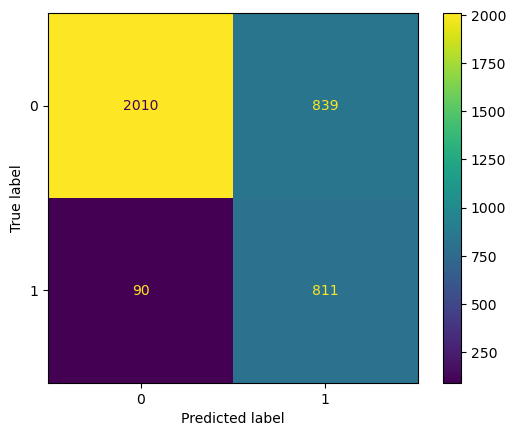

In [37]:
# perform naive bayes model
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_y_pred = nb_model.predict(x_test)

def gaussian_nb_result(x_train, x_test, y_train, y_test):
    '''
        Accept training and tesing x y data to build model, calculate scores and visualize confusion matrix
        Arguments
            x_train (data frame) training predictors
            x_test (data frame)  testing predictors
            y_train (data frame) training target
            y_test (data frame) testing target
        Return
            score_table (data frame) calculated f1, accuracy, precision and recall data
    '''
    
    # Data fitting
    nb_model = GaussianNB()
    nb_model.fit(x_train,y_train)
    nb_y_pred = nb_model.predict(x_test)
    # Scoring
    f1 = f1_score(nb_y_pred, y_test)
    accuracy = accuracy_score(nb_y_pred, y_test)
    precision = precision_score(nb_y_pred, y_test)
    recall = recall_score(nb_y_pred, y_test)
    
    # printing scores
    print("")
    print('F1 Score : ', f1)
    print('Accuracy Score : ', accuracy)
    print('Precision Score :', precision)
    print('Recall Score : ', recall)
    print("")
    
    # build confusion matrix
    cm = confusion_matrix(y_test, nb_y_pred, labels = nb_model.classes_)
    # display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb_model.classes_)
    disp.plot()
    # return data data frame of best scores
    score_table = pd.DataFrame({'Model' : ['Gaussian NB Model'],
                          'F1' : [f1],
                          'Recall' : [recall],
                          'Precision' : [precision],
                          'Accuracy' : [accuracy]
                        })
    return score_table
nb_model_score = gaussian_nb_result(x_train, x_test, y_train, y_test)
nb_model_score




F1 Score :  0.9351351351351351
Accuracy Score :  0.968
Precision Score : 0.9600443951165372
Recall Score :  0.9114857744994731

                      Model        F1    Recall  Precision  Accuracy
0  Decision Tree Classifier  0.935135  0.911486   0.960044     0.968


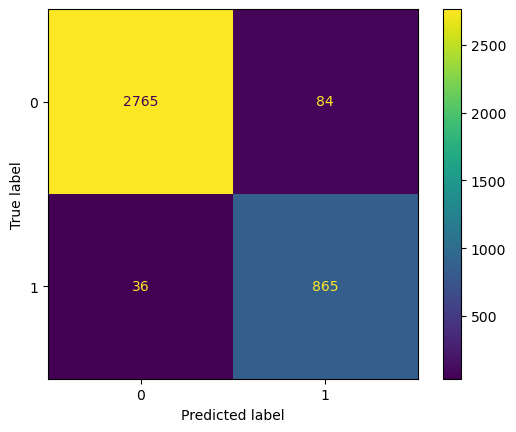

In [38]:
# Decision tree classifiers
def dt_classifier_result(x_train, x_test, y_train, y_test):
    # Data fitting
    dt_model = DecisionTreeClassifier()
    dt_model.fit(x_train, y_train)
    df_model_pred = dt_model.predict(x_test)
    # Scoring
    f1 = f1_score(df_model_pred, y_test)
    accuracy = accuracy_score(df_model_pred, y_test)
    precision = precision_score(df_model_pred, y_test)
    recall = recall_score(df_model_pred, y_test)
    # printing scores
    print("")
    print('F1 Score : ', f1)
    print('Accuracy Score : ', accuracy)
    print('Precision Score :', precision)
    print('Recall Score : ', recall)
    print("")
    # build confusion matrix
    cm = confusion_matrix(y_test, df_model_pred, labels = nb_model.classes_)
    # display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nb_model.classes_)
    disp.plot()
    # return data data frame of best scores
    score_table = pd.DataFrame({'Model' : ['Decision Tree Classifier'],
                          'F1' : [f1],
                          'Recall' : [recall],
                          'Precision' : [precision],
                          'Accuracy' : [accuracy]
                        })
    return score_table
dt_model = dt_classifier_result(x_train, x_test, y_train, y_test)
print(dt_model)


In [39]:
def gs_cv(model, no_cv, scoring, params, x_train, y_train):
    '''
    Build GridSearchCV and return model
    Arguments
        model (model) defined model before fitting
        no_cv (int) number of cv for cross validations
        scoring (list)  a list of  scores such as 'accuracy', 'precision', 'recall' and 'f1'
        params (library) parameters of  model such as max_depth or min_samples_leaf
        x_train (data frame) training predictors
        y_train (data frame) testing predictores
    Return
        model_cv (model) fitted model after cross validation    
    '''
    model_cv = GridSearchCV(model, scoring = scoring, param_grid = params, cv = no_cv, refit = 'f1')
    model_cv.fit(x_train, y_train)
    print("The best Parameters :", model_cv.best_params_)
    return model_cv

dt_model = DecisionTreeClassifier()
scoring = ['f1', 'accuracy', 'precision', 'recall' ]

param = {'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5]}

dt_classifier_model = gs_cv(dt_model, 3, scoring, param, x_train, y_train)
   

The best Parameters : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [45]:
def make_results(model_name, model_object):
    '''
    Accepts as argments a model name (string) and a fit GridSearchCV model object.

    Return a pandas df with th eF1, recall, precision and accuracy scores for the
     model with the best mean F1 score across all validation folds.

    '''
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the ros of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax()]
    print("The best Parameters:", model_object.best_params_)

    # Extract accuracy, precision, recall and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model' : [model_name],
                          'F1' : [f1],
                          'Recall' : [recall],
                          'Precision' : [precision],
                          'Accuracy' : [accuracy]
                        }
    )
    return table

dt_classifier_model_result = make_results('DecisionTreeClassifier', dt_classifier_model)

The best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [41]:
# Random Forest model
rf_model = RandomForestClassifier()
params = {'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5]}
# rf_model_cv = gs_cv(rf_model,5,  scoring, params, x_train, y_train)
# make_results("Random Forest Classifier CV : ",rf_model_cv )


In [48]:
path = 'C:/Users/soonn/Documents/GitHub/Hr_Analytics_Job_Prediction\Models'

def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model
# write_pickle(path, rf_model_cv, 'random_forest_v1')
rf_model_cv = read_pickle(path, 'random_forest_v1')
rf_model_cv_result = make_results("Random Forest Classifier CV : ",rf_model_cv )

The best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [51]:
## XGBoost model with cv
xgb = XGBClassifier()

# Define the parameter grid
params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'min_child_weight': [1, 5]
}

#xgb_model_cv = gs_cv(xgb, 5, scoring, params, x_train, y_train)


#write_pickle(path, xgb_model_cv, 'xgb_v1')
xgb_model_cv = read_pickle(path, 'xgb_v1')
xgb_model_cv_result = make_results('XGB Classifier', xgb_model_cv)

The best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300}


In [52]:
model_result = pd.concat([nb_model_score,dt_classifier_model_result,rf_model_cv_result,xgb_model_cv_result], axis = 0)

In [54]:
model_result.sort_values(by = 'F1', ascending = False)

,Model,F1,Recall,Precision,Accuracy
0,Random Forest Classifier CV :,0.954212,0.956286,0.952296,0.977776
0,XGB Classifier,0.943996,0.936138,0.952142,0.973242
0,DecisionTreeClassifier,0.923596,0.937079,0.910509,0.963197
0,Gaussian NB Model,0.635829,0.491515,0.900111,0.752267


In [56]:
rf_model_cv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [63]:
final_model = RandomForestClassifier(**rf_model_cv.best_params_)
final_model.fit(x_train,y_train)
y_pred = final_model.predict(x_test)

recall = recall_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
precision = precision_score(y_pred,y_test)
accuracy = accuracy_score(y_pred,y_test)

table = pd.DataFrame({'Model' : ['Random Forest Classifier'],
                          'F1' : [f1],
                          'Recall' : [recall],
                          'Precision' : [precision],
                          'Accuracy' : [accuracy]
                        }
    )

print(table)


                      Model       F1    Recall  Precision  Accuracy
0  Random Forest Classifier  0.95847  0.944026   0.973363  0.979733


np.int64(3571)

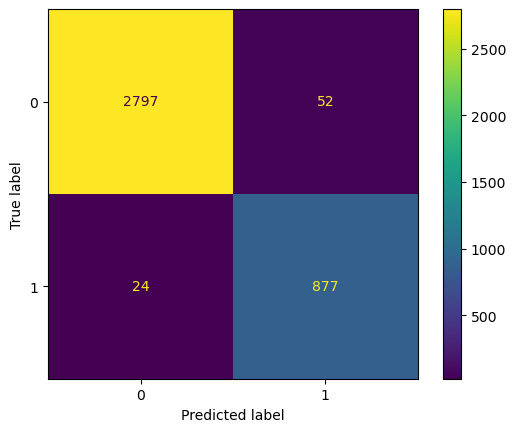

In [91]:
cm = confusion_matrix(y_test, y_pred, labels = final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = final_model.classes_)
disp.plot()



## Interpretation of confusion matrix
the final model predict 877 employees will leave the company and 2797 emplayees will stay at the company.
False negative and false positive.
52 employees is predicted to leave the company by the model, but they would stay.
on the other hands, 24 employees are predicted to stay, but they would leave.


## summary
After testing Gaussian Naïve Bayes, Decision Tree, Random Forest, and XGBoost, the Random Forest model emerged as the best performer, achieving the highest F1-score of approximately 96%, indicating high reliability in predictions.
By leveraging cross-validation techniques, the model's accuracy was optimized, ensuring robust performance across different data splits. With this powerful predictive capability, leadership can proactively identify employees at risk of leaving the company, allowing them to make informed decisions based on key model features.


## Next step.
Increasing satisfactions and evaluation.
two goals, sample groups with fatures to find the best way to increase satisfaction and evaluation for A/B test

workload distribution.
group 1 under workload
group 2 over workload
    check the change of satisfaction and left rate
group 3 optimal workload
    
maintainin optimal work time

Promotion.
    increasing promotion rate.
    developing employees skills and promote
    a group with low sat/eval who longer work year without promotion.
    

np.int64(3571)

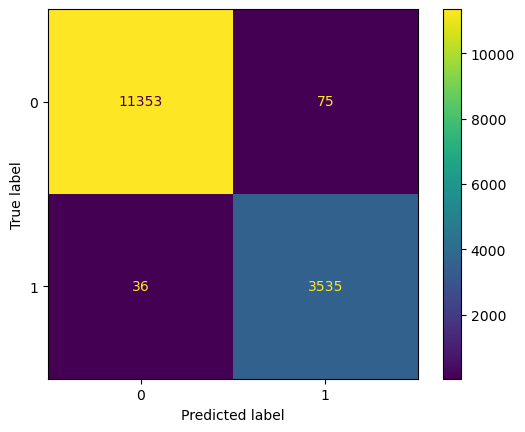

In [93]:
y_pred = final_model.predict(x)
cm = confusion_matrix(y, y_pred, labels = final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = final_model.classes_)
disp.plot()

df['left'].sum()